In [1]:
import sys
sys.path.append('/home/nicolol/workspace/QuICCPython/')
sys.path.append('/home/nicolol/workspace/QuICC/Python/')

In [178]:
import numpy as np
from NLMLib import SpectralState, PhysicalState
from quicc.projection import shell

In [179]:
statefile = SpectralState('State_files/st_Ra40Pm05_NC.hdf5', 'cartesian')

<HDF5 dataset "bx": shape (127, 64, 192), type "|V16">
<HDF5 dataset "by": shape (127, 64, 192), type "|V16">
<HDF5 dataset "dz_meantemperature": shape (127, 64, 192), type "|V16">
<HDF5 dataset "emfx": shape (127, 64, 192), type "|V16">
<HDF5 dataset "emfy": shape (127, 64, 192), type "|V16">
<HDF5 dataset "jz": shape (127, 64, 192), type "|V16">
<HDF5 dataset "bc_bx": shape (), type "<f8">
<HDF5 dataset "bc_by": shape (), type "<f8">
<HDF5 dataset "bc_streamfunction": shape (), type "<f8">
<HDF5 dataset "bc_temperature": shape (), type "<f8">
<HDF5 dataset "bc_velocityz": shape (), type "<f8">
<HDF5 dataset "magnetic_prandtl": shape (), type "<f8">
<HDF5 dataset "prandtl": shape (), type "<f8">
<HDF5 dataset "rayleigh": shape (), type "<f8">
<HDF5 dataset "scale1d": shape (), type "<f8">
<HDF5 dataset "tau": shape (), type "<f8">
<HDF5 dataset "pressure": shape (127, 64, 192), type "|V16">
<HDF5 dataset "time": shape (), type "<f8">
<HDF5 dataset "timestep": shape (), type "<f8">
<HD

In [180]:
statefile.fields.velocityz.shape

(127, 64, 192)

<IPython.core.display.Javascript object>


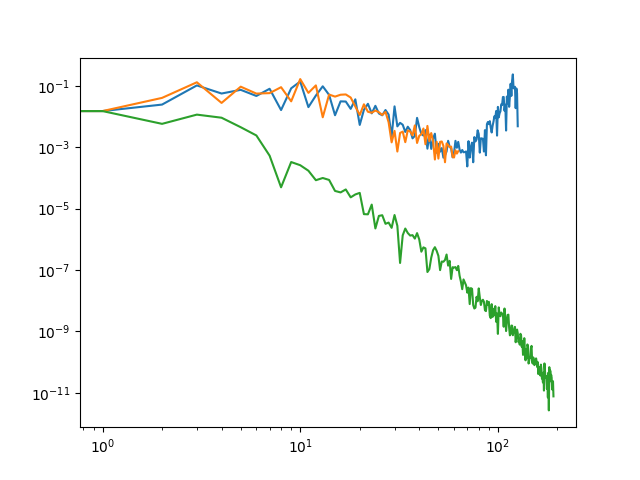

In [181]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.loglog(np.abs(statefile.fields.velocityz[:,1, 1]))

plt.loglog(np.abs(statefile.fields.velocityz[1, :, 1]))
plt.loglog(np.abs(statefile.fields.velocityz[1, 1, :]))

<IPython.core.display.Javascript object>


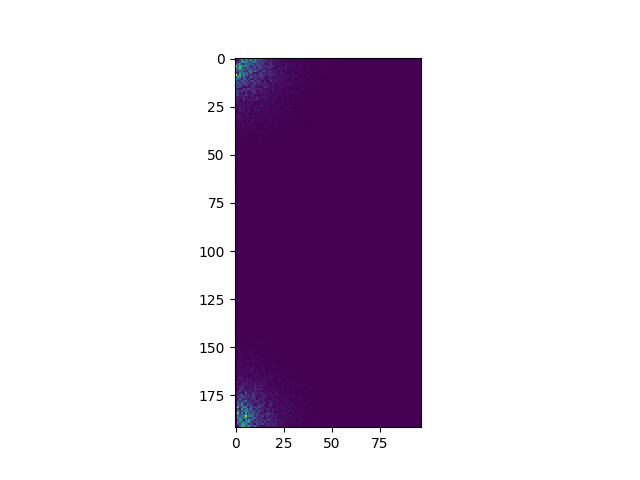

536.235936717226

In [177]:
# try to do FFT transforms on one slice

%matplotlib notebook
old_field = statefile.fields.velocityz
field = np.zeros((192,97,288), dtype=complex)
field[:65, :64, :192] = old_field[:65,:,:192]
field[-63:, :64, :192] = old_field[-63:, :, :192]
#field = old_field
real_field = np.fft.irfft2(field[:, :, 3])
plt.imshow(np.abs(field[:,:,3]))
np.sum(np.abs(old_field))

In [182]:
# generate the projector
x = np.array([0])
PI = shell.eval(192, 1., 0., x)
#PI[0,0]=2.
#PI/=2.

In [183]:

res = 150
real_field = np.fft.irfft2(old_field, axes = (0,1))

<IPython.core.display.Javascript object>


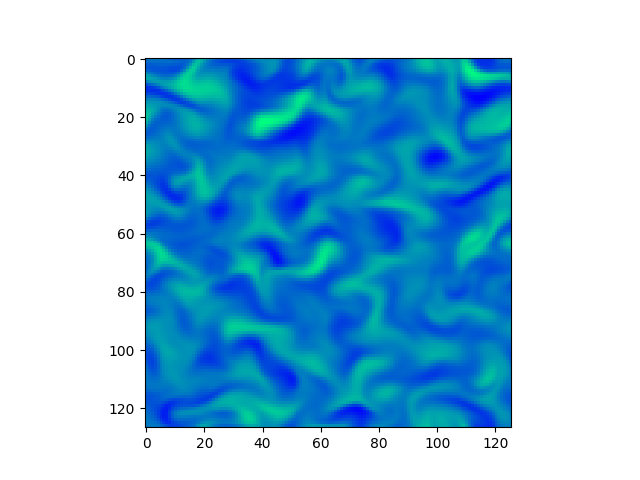

In [185]:
%matplotlib notebook
plt.imshow(np.dot(real_field, PI.T), cmap = 'winter')

In [171]:
np.max(np.dot(real_field, PI.T))*192**2

37.28766295724682

In [164]:
np.min(np.dot(real_field, PI.T))/np.max(np.dot(real_field, PI.T))

-0.9274991929752563

In [165]:
np.dot(real_field, PI.T).shape

(192, 192)

<IPython.core.display.Javascript object>


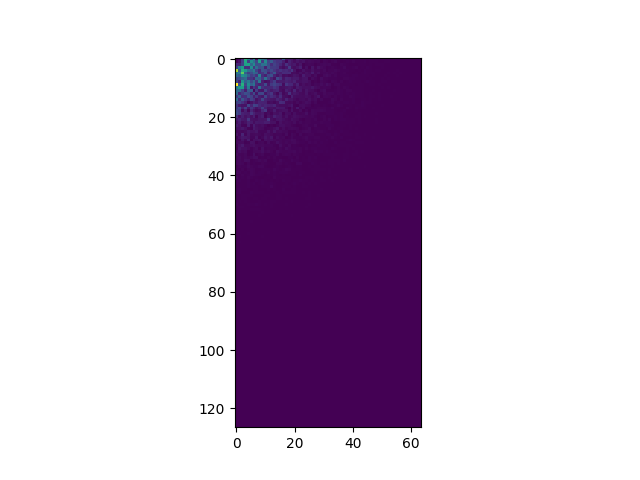

In [115]:
%matplotlib notebook
plt.imshow(np.abs(field[:, :, 3]))